# Ejercicio Ridge, Lasso y ElasticNet
Para este ejercicio vas a trabajar con datos de ventas de una empresa que fabrica muebles en España. Esta empresa es una Pyme que demanda conocer de antemano qué ingresos va a tener cada mes, ya que necesita pedir un anticipio a su entidad financiera de cara a poder abastecerse de materia prima al comenzar el mes. Como desconoce cuánto tiene que pedir, tira al alza y acaba pagando muchos intereses. El objetivo es reducir estos gastos.

En las bases de datos de la empresa constan todos los gastos en publicidad y ventas para cada uno de los meses desde su fundación (hace más de 15 años).

Dado que los presupuestos de marketing se cierran al principio de cada mes, la empresa necesita un modelo predictivo que le anticipe las ventas que conseguirá a final de mes en función de los gastos que realizará en marketing.

Para ello tendrás que utilizar tanto modelos de regresión normales, como regularizados.

1. Carga los datos y realiza un pequeño análisis exploratorio. Mira a ver cómo se relaciona las ventas con el resto de variables.
2. Crea varios modelos y modifica los hiperparámetros necesarios para mejorar el performance del modelo.

*NOTA: No hemos visto qué significa cada uno de los parámetros de este algoritmo, pero por suerte nos los definen en su propia documentación. Nadie sabe al 100% cómo están implementados todos los algoritmos, y cómo afectan todos y cada uno de sus parámetros, por eso lo tienen bien documentado. Así que para investigar qué modelo se puede adaptar mejor a tus datos, a veces hay que probar variando estos parámetros (pero no vayas a lo loco, léete qué hacen para actuar con sentido).*

## Importamos librerías

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

## Análisis Exploratorio de Datos

Ahora es tu turno. Anteriormente, hemos estado guiando tanto el análisis de datos (cuando nos centrábamos en él) como la creación del modelo. Sin embargo, ahora es tu turno, debes volar libre e investigar como un buen data scientist.

Tampoco debe ser nada especial, que no es un proyecto en sí, simplemente algo básico como lo que hemos visto hasta ahora.

In [13]:
DATAPATH = 'data/Advertising.csv'

data = pd.read_csv(DATAPATH)
data.drop(columns=['Unnamed: 0'], inplace=True)
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0


In [18]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14022.500000
std,85.854236,14.846809,21.778621,5217.456566
min,0.700000,0.000000,0.300000,1600.000000
25%,74.375000,9.975000,12.750000,10375.000000
50%,149.750000,22.900000,25.750000,12900.000000
75%,218.825000,36.525000,45.100000,17400.000000
max,296.400000,49.600000,114.000000,27000.000000


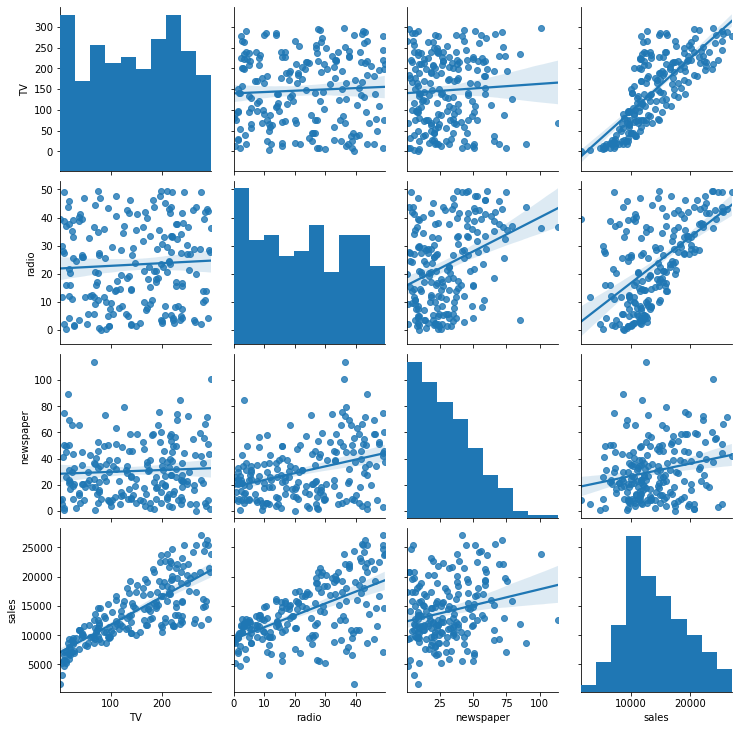

In [22]:
sns.pairplot(data, kind='reg')

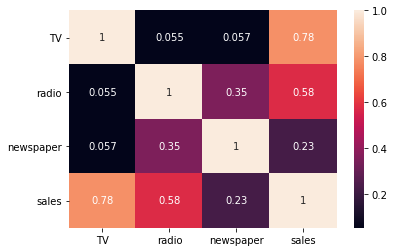

In [25]:
sns.heatmap(data.corr(), annot=True)

In [27]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0


In [28]:
y_col = 'sales'
x_cols = [col for col in data.columns if col != y_col]

X = data[x_cols]
Y = data[y_col]

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [37]:
from sklearn.linear_model import LinearRegression

modelo_lineal = LinearRegression()

modelo_lineal.fit(x_train, y_train)

LinearRegression()

In [40]:
modelo_lineal.score(x_train, y_train)

0.9055159502227753

In [41]:
modelo_lineal.score(x_test, y_test)

0.8609466508230366

In [42]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(modelo_lineal, x_train, y_train, cv=5)

In [46]:
mean_lineal = scores.mean()

In [142]:
from sklearn.linear_model import Ridge
  
# Train the model  
ridgeR = Ridge(alpha = 0.033, normalize=True)
ridgeR.fit(x_train, y_train) 
y_pred = ridgeR.predict(x_test)

In [143]:
ridgeR.score(x_train, y_train)

0.9046785780588241

In [144]:
ridgeR.score(x_test, y_test)

0.8597356509112999

In [133]:
np.linspace(0.025, 0.05)

array([0.025     , 0.0255102 , 0.02602041, 0.02653061, 0.02704082,
       0.02755102, 0.02806122, 0.02857143, 0.02908163, 0.02959184,
       0.03010204, 0.03061224, 0.03112245, 0.03163265, 0.03214286,
       0.03265306, 0.03316327, 0.03367347, 0.03418367, 0.03469388,
       0.03520408, 0.03571429, 0.03622449, 0.03673469, 0.0372449 ,
       0.0377551 , 0.03826531, 0.03877551, 0.03928571, 0.03979592,
       0.04030612, 0.04081633, 0.04132653, 0.04183673, 0.04234694,
       0.04285714, 0.04336735, 0.04387755, 0.04438776, 0.04489796,
       0.04540816, 0.04591837, 0.04642857, 0.04693878, 0.04744898,
       0.04795918, 0.04846939, 0.04897959, 0.0494898 , 0.05      ])

In [137]:
from sklearn.model_selection import GridSearchCV

grid = dict()
grid['alpha'] = np.linspace(0, 0.05, 500)
# define search
search = GridSearchCV(ridgeR, grid, scoring='r2', cv=10, n_jobs=-1)
# perform the search
results = search.fit(x_train, y_train)

In [138]:
results.best_params_

{'alpha': 0.03336673346693387}

In [141]:
-results.best_score_

-0.8757188221194679